In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 보팅분류기

In [24]:
# 데이터 로딩
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [25]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2,
                                                    random_state=0 )

# 보팅분류기 생성
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=7)
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN', knn_clf)],
                          voting='soft')

# 분류기 학습 - 예측 - 평가
vo_clf.fit(X_train, y_train)
vo_pred = vo_clf.predict(X_test)
accuracy_score(y_test, vo_pred)

c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


0.956140350877193

In [26]:
confusion_matrix(y_test, vo_pred)

array([[44,  3],
       [ 2, 65]])

# 배깅과 부스팅

https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones



# UCI 데이터 수집

In [2]:
import urllib.request
import zipfile
import os

# 데이터 디렉토리 생성
os.makedirs('./data', exist_ok=True)

# UCI HAR 데이터셋 다운로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
zip_path = "./data/UCI_HAR_Dataset.zip"

print("다운로드 중...")
urllib.request.urlretrieve(url, zip_path)

# 압축 해제
print("압축 해제 중...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./data/')

# 폴더명 확인 (공백 포함 여부)
print(os.listdir('./data/'))

다운로드 중...
압축 해제 중...
['UCI HAR Dataset', 'UCI_HAR_Dataset.zip', '__MACOSX']


# get_human_dataset()

In [8]:
def get_human_dataset(base_path='./data/UCI HAR Dataset/'):

    # 피처 이름 로딩

    feature_path = base_path + 'features.txt'

    feature_name_df = pd.read_csv(feature_path, sep='\s+', header=None, names=['column_index', 'column_name'])



    # 중복 피처명 처리

    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    feature_names = new_feature_name_df['column_name'].tolist()



    # 학습/테스트 데이터 로딩

    X_train = pd.read_csv(base_path + 'train/X_train.txt', sep='\s+', names=feature_names)

    X_test = pd.read_csv(base_path + 'test/X_test.txt', sep='\s+', names=feature_names)



    y_train = pd.read_csv(base_path + 'train/y_train.txt', sep='\s+', header=None, names=['action'])

    y_test = pd.read_csv(base_path + 'test/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

# plot_feature_importances()

In [4]:
# 피처 중요도 출력
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, feature_names, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(10, top_n * 0.4))  # 피처 수에 따라 자동 높이 조절

    plt.barh(range(top_n), importances[indices][::-1], align='center')
    plt.yticks(range(top_n), np.array(feature_names)[indices][::-1])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importances')
    plt.tight_layout()
    plt.show()



# clean_feature_name()

In [5]:
import re
def clean_feature_name(name):
    # 특수문자 제거: 괄호, 콤마, 하이픈 등
    return re.sub('[^A-Za-z0-9_]+', '_', name)

# get_new_feature_name_df()

In [6]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = old_feature_name_df.groupby('column_name').cumcount()
    new_feature_name_df = old_feature_name_df.copy()
    new_feature_name_df = new_feature_name_df.reset_index(drop=True)  # 인덱스 리셋
    feature_dup_df = feature_dup_df.reset_index(drop=True)            # 인덱스 리셋
    new_feature_name_df['column_name'] = new_feature_name_df['column_name'] + "_" + feature_dup_df.astype(str)
    return new_feature_name_df

# 데이터 분할

In [10]:
X_train, X_test, y_train, y_test = get_human_dataset(base_path='./data/UCI HAR Dataset/')

print(X_train.shape, X_test.shape)
print(y_train['action'].value_counts())

(7352, 561) (2947, 561)
action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


# 랜덤포레스트 : 배깅

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)


c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9195792331184255

# 랜덤포레스트 GridSearchCV

In [ ]:
#3m
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8,16,24, 32],
    'min_samples_split' : [2,8,16],
    'min_samples_leaf': [1,6,12]
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_, grid_cv.best_score_

c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


({'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2},
 np.float64(0.9164853101196953))

In [13]:
# 모델 성능 평가
best_model = grid_cv.best_estimator_
best_pred = best_model.predict(X_test)
accuracy_score(y_test, best_pred)

0.9260264675941635

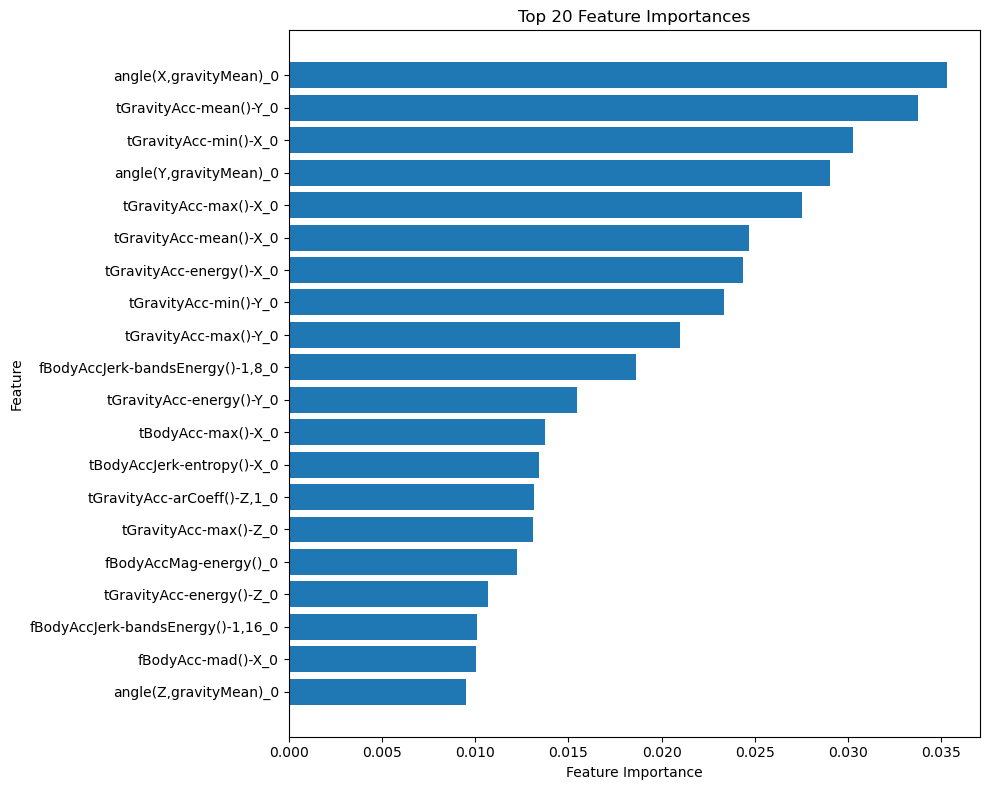

In [14]:
plot_feature_importances(best_model, feature_names=X_train.columns)

# 부스팅 : GBM Gradient Boosting Macine

In [ ]:
#24m
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
accuracy_score(y_test, gb_pred)

c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9392602646759416

# XGBOOST

In [16]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Series → 1D array
y_test_encoded = le.transform(y_test)

c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\sklearn\preprocessing\_label.py:139: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [18]:
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=3,
    early_stopping_rounds=40,   # 여기로 이동
    eval_metric='mlogloss',      # 여기로 이동
    use_label_encoder=False
)

evals = [(X_test, y_test_encoded)]
xgb.fit(X_train, y_train_encoded, eval_set=evals, verbose=True)

xgb_pred = xgb.predict(X_test)

c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\xgboost\callback.py:385: UserWarning: [16:56:51] WARNING: D:\bld\xgboost-split_1770963345048\work\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	validation_0-mlogloss:1.58935
[1]	validation_0-mlogloss:1.43427
[2]	validation_0-mlogloss:1.30574
[3]	validation_0-mlogloss:1.19599
[4]	validation_0-mlogloss:1.10248
[5]	validation_0-mlogloss:1.02101
[6]	validation_0-mlogloss:0.95056
[7]	validation_0-mlogloss:0.88688
[8]	validation_0-mlogloss:0.82959
[9]	validation_0-mlogloss:0.77840
[10]	validation_0-mlogloss:0.73146
[11]	validation_0-mlogloss:0.69110
[12]	validation_0-mlogloss:0.65323
[13]	validation_0-mlogloss:0.61867
[14]	validation_0-mlogloss:0.58887
[15]	validation_0-mlogloss:0.56110
[16]	validation_0-mlogloss:0.53598
[17]	validation_0-mlogloss:0.51260
[18]	validation_0-mlogloss:0.49119
[19]	validation_0-mlogloss:0.47062
[20]	validation_0-mlogloss:0.45277
[21]	validation_0-mlogloss:0.43587
[22]	validation_0-mlogloss:0.41986
[23]	validation_0-mlogloss:0.40468
[24]	validation_0-mlogloss:0.39166
[25]	validation_0-mlogloss:0.37742
[26]	validation_0-mlogloss:0.36654
[27]	validation_0-mlogloss:0.35406
[28]	validation_0-mlogloss:0.3

In [19]:
print(classification_report(y_test_encoded, xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       0.94      0.94      0.94       471
           2       0.98      0.94      0.96       420
           3       0.95      0.87      0.90       491
           4       0.89      0.95      0.92       532
           5       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



# LGBM

In [21]:
import re

# 특수문자 제거/치환
X_train.columns = [re.sub(r'[^A-Za-z0-9_]', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'[^A-Za-z0-9_]', '_', col) for col in X_test.columns]

In [22]:
from lightgbm import early_stopping, log_evaluation
from lightgbm import LGBMClassifier

evals = [(X_test, y_test_encoded)]
lgb = LGBMClassifier(n_estimators=400, objective='multiclass',
                     num_class=len(np.unique(y_train_encoded)))

lgb.fit(X_train, y_train_encoded,
        eval_set=evals,
        callbacks=[early_stopping(40), log_evaluation(period=10)])  # 10 iter마다 출력

lgb_pred = lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140170
[LightGBM] [Info] Number of data points in the train set: 7352, number of used features: 561
[LightGBM] [Info] Start training from score -1.791216
[LightGBM] [Info] Start training from score -1.924514
[LightGBM] [Info] Start training from score -2.009071
[LightGBM] [Info] Start training from score -1.743436
[LightGBM] [Info] Start training from score -1.677246
[LightGBM] [Info] Start training from score -1.653513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 40 rounds
[10]	valid_0's multi_logloss: 0.499944
[20]	valid_0's multi_logloss: 0.292755
[30]	valid_0's multi_logloss: 0.24341
[40]	valid_0's multi_logloss: 0.23376
[50]	valid_0's multi_logloss: 0.236224
[60]	valid_0's multi_logloss: 0.249222
[70]	valid_0's mu

In [23]:
print(classification_report(y_test_encoded, lgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       496
           1       0.93      0.90      0.92       471
           2       0.95      0.92      0.94       420
           3       0.92      0.82      0.87       491
           4       0.85      0.94      0.89       532
           5       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947

